In [ ]:
import pandas as pd
from imblearn.under_sampling import NearMiss
from collections import Counter
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt

from google.colab import drive
df = pd.read_csv('/content/drive/MyDrive/nearest-earth-objects(1910-2024).csv')

df.head()

,neo_id,name,absolute_magnitude,estimated_diameter_min,estimated_diameter_max,orbiting_body,relative_velocity,miss_distance,is_hazardous
0,2162117,162117 (1998 SD15),19.14,0.394962,0.883161,Earth,71745.401048,5.814362e+07,False
1,2349507,349507 (2008 QY),18.50,0.530341,1.185878,Earth,109949.757148,5.580105e+07,True
2,2455415,455415 (2003 GA),21.45,0.136319,0.304818,Earth,24865.506798,6.720689e+07,False
3,3132126,(2002 PB),20.63,0.198863,0.444672,Earth,78890.076805,3.039644e+07,False
4,3557844,(2011 DW),22.70,0.076658,0.171412,Earth,56036.519484,6.311863e+07,False


In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

df = pd.read_csv('/content/drive/MyDrive/nearest-earth-objects(1910-2024).csv')

df.head()

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


,neo_id,name,absolute_magnitude,estimated_diameter_min,estimated_diameter_max,orbiting_body,relative_velocity,miss_distance,is_hazardous
0,2162117,162117 (1998 SD15),19.14,0.394962,0.883161,Earth,71745.401048,5.814362e+07,False
1,2349507,349507 (2008 QY),18.50,0.530341,1.185878,Earth,109949.757148,5.580105e+07,True
2,2455415,455415 (2003 GA),21.45,0.136319,0.304818,Earth,24865.506798,6.720689e+07,False
3,3132126,(2002 PB),20.63,0.198863,0.444672,Earth,78890.076805,3.039644e+07,False
4,3557844,(2011 DW),22.70,0.076658,0.171412,Earth,56036.519484,6.311863e+07,False


In [ ]:
df_tratado = df.copy()

In [ ]:
df_tratado = df_tratado.drop(columns=['neo_id', 'name', 'orbiting_body'])

In [ ]:
df_tratado.head()

,absolute_magnitude,estimated_diameter_min,estimated_diameter_max,relative_velocity,miss_distance,is_hazardous
0,19.14,0.394962,0.883161,71745.401048,5.814362e+07,False
1,18.50,0.530341,1.185878,109949.757148,5.580105e+07,True
2,21.45,0.136319,0.304818,24865.506798,6.720689e+07,False
3,20.63,0.198863,0.444672,78890.076805,3.039644e+07,False
4,22.70,0.076658,0.171412,56036.519484,6.311863e+07,False


In [ ]:
df_tratado.isnull().sum()

,0
absolute_magnitude,28
estimated_diameter_min,28
estimated_diameter_max,28
relative_velocity,0
miss_distance,0
is_hazardous,0


In [ ]:
df_tratado = df_tratado.dropna()

In [ ]:
df_tratado.isnull().sum()

,0
absolute_magnitude,0
estimated_diameter_min,0
estimated_diameter_max,0
relative_velocity,0
miss_distance,0
is_hazardous,0


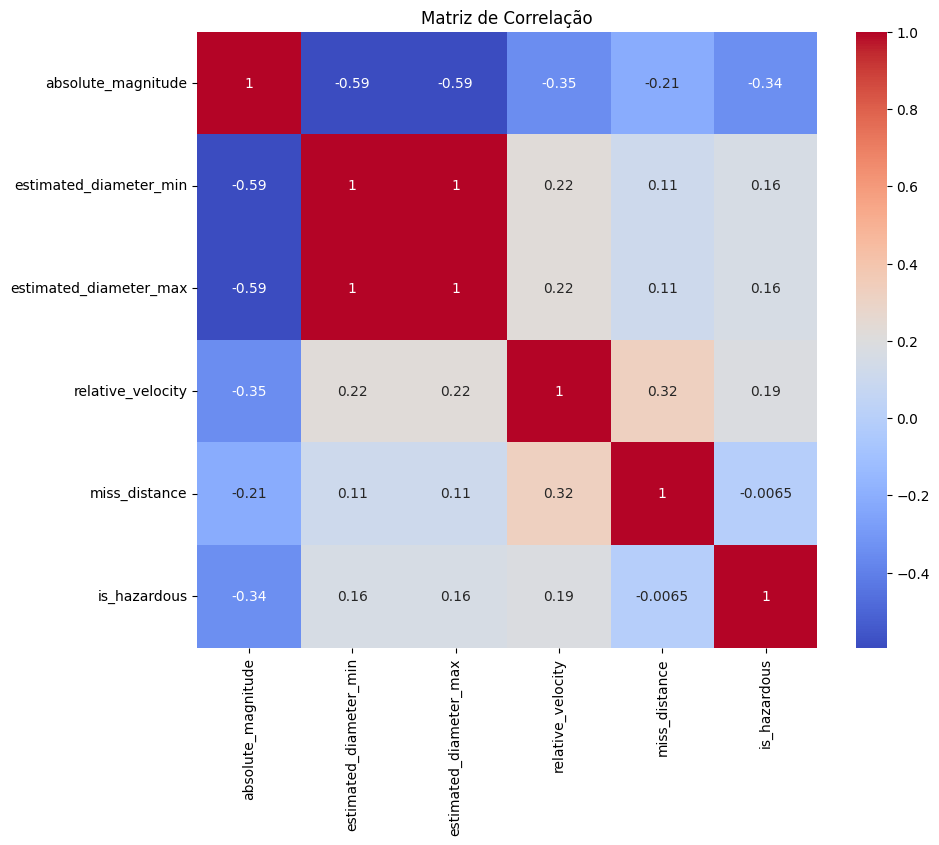

In [ ]:
correlation_matrix = df_tratado.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Matriz de Correlação')
plt.show()

In [ ]:
#USANDO O NEARMISS DO IMBLEARN

# Separando os dados em treino e teste (ajuste do test_size é feito aqui)
X = df_tratado.drop('is_hazardous', axis=1)
y = df_tratado['is_hazardous']
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Aplicando NearMiss
nr = NearMiss()
X_res, y_res = nr.fit_resample(X_train, y_train)

# Criando DataFrames com os dados balanceados
X_res_df = pd.DataFrame(X_res, columns=X_train.columns)
y_res_df = pd.DataFrame(y_res, columns=['is_hazardous'])

# Concatenando os DataFrames para ter o conjunto de dados balanceado completo
df_tratado = pd.concat([X_res_df, y_res_df], axis=1)
df_sem_target = X_res_df

print(Counter(df_tratado['is_hazardous']))

df_sem_target

Counter({False: 34615, True: 34615})


,absolute_magnitude,estimated_diameter_min,estimated_diameter_max,relative_velocity,miss_distance
0,26.83,0.011443,0.025588,56626.307079,6.336473e+07
1,18.90,0.441118,0.986370,83160.093554,7.332415e+07
2,18.82,0.457673,1.023387,83160.094919,7.332416e+07
3,23.38,0.056047,0.125326,38680.773182,1.361339e+07
4,20.85,0.179703,0.401828,44628.839327,2.757973e+07
...,...,...,...,...,...
69225,21.04,0.164647,0.368163,58876.395872,4.201037e+07
69226,21.11,0.159424,0.356484,76096.688327,1.736887e+07
69227,20.72,0.190790,0.426619,56577.713482,2.367181e+07
69228,21.23,0.150853,0.337318,33187.667593,3.503388e+07


<Axes: >

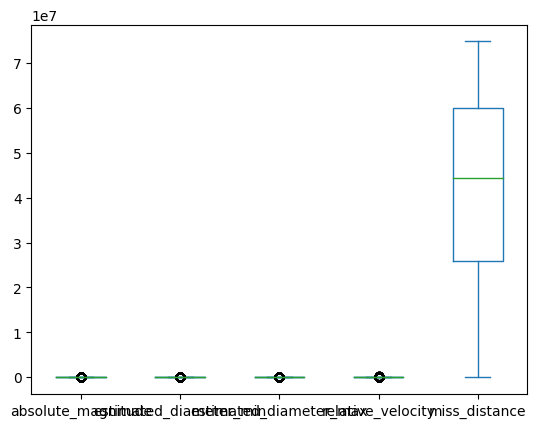

In [ ]:
df_sem_target.plot(kind = "box")

In [ ]:
q1 = df_sem_target.quantile(0.25)
q3 = df_sem_target.quantile(0.75)
iqr = q3 - q1
lLim = q1 - 1.5 * iqr
hLim = q3 + 1.5 * iqr

for col in df_sem_target.columns:
    df_sem_target.loc[df_sem_target[col] < lLim[col], col] = lLim[col]
    df_sem_target.loc[df_sem_target[col] > hLim[col], col] = hLim[col]


<Axes: >

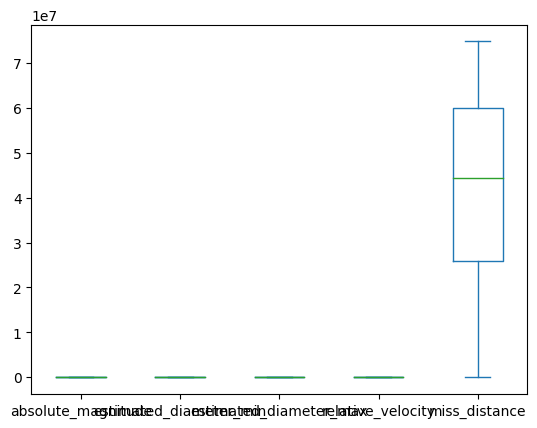

In [ ]:
df_sem_target.plot(kind = "box")

In [ ]:
from sklearn.preprocessing import Normalizer

df_sem_target[['absolute_magnitude', 'estimated_diameter_min', 'estimated_diameter_max', 'relative_velocity', 'miss_distance']] = Normalizer().fit_transform(df_tratado[['absolute_magnitude', 'estimated_diameter_min', 'estimated_diameter_max', 'relative_velocity', 'miss_distance']])
df_sem_target

,absolute_magnitude,estimated_diameter_min,estimated_diameter_max,relative_velocity,miss_distance
0,4.234215e-07,1.805956e-10,4.038241e-10,0.000894,1.000000
1,2.577594e-07,6.015997e-09,1.345218e-08,0.001134,0.999999
2,2.566683e-07,6.241768e-09,1.395702e-08,0.001134,0.999999
3,1.717420e-06,4.117057e-09,9.206020e-09,0.002841,0.999996
4,7.559889e-07,6.515749e-09,1.456966e-08,0.001618,0.999999
...,...,...,...,...,...
69225,5.008282e-07,3.919206e-09,8.763610e-09,0.001401,0.999999
69226,1.215381e-06,9.178660e-09,2.052411e-08,0.004381,0.999990
69227,8.753002e-07,8.059762e-09,1.802218e-08,0.002390,0.999997
69228,6.059846e-07,4.305926e-09,9.628344e-09,0.000947,1.000000


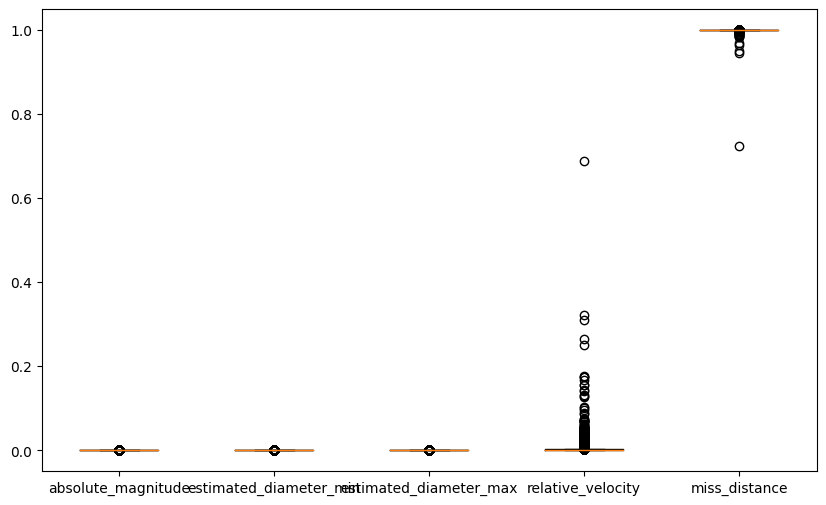

In [ ]:
plt.figure(figsize=(10, 6))
plt.boxplot([df_sem_target[col] for col in df_sem_target.columns], labels=df_sem_target.columns)
plt.show()


In [ ]:
df_com_target = pd.concat([df_sem_target, y_res_df], axis=1)
df_com_target


,absolute_magnitude,estimated_diameter_min,estimated_diameter_max,relative_velocity,miss_distance,is_hazardous
0,4.234215e-07,1.805956e-10,4.038241e-10,0.000894,1.000000,False
1,2.577594e-07,6.015997e-09,1.345218e-08,0.001134,0.999999,False
2,2.566683e-07,6.241768e-09,1.395702e-08,0.001134,0.999999,False
3,1.717420e-06,4.117057e-09,9.206020e-09,0.002841,0.999996,False
4,7.559889e-07,6.515749e-09,1.456966e-08,0.001618,0.999999,False
...,...,...,...,...,...,...
69225,5.008282e-07,3.919206e-09,8.763610e-09,0.001401,0.999999,True
69226,1.215381e-06,9.178660e-09,2.052411e-08,0.004381,0.999990,True
69227,8.753002e-07,8.059762e-09,1.802218e-08,0.002390,0.999997,True
69228,6.059846e-07,4.305926e-09,9.628344e-09,0.000947,1.000000,True


In [ ]:
df_com_target.to_csv('dados_asteroides_processados.csv', index=False)
